## 5.3 Gradient Descent

**실제값을 Y=4X+6 시뮬레이션하는 데이터 값 생성**

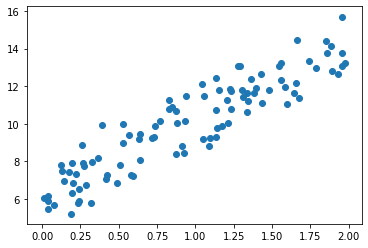

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1)
y = 6 +4 * X+ np.random.randn(100,1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

In [2]:
X.shape, y.shape

((100, 1), (100, 1))

In [3]:
w1 = np.zeros((1,1))

In [4]:
w1

array([[0.]])

In [5]:
np.zeros_like(w1)

array([[0.]])

In [6]:
w1.T

array([[0.]])

In [7]:
np.dot(X, w1.T) + w1

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

**w0과 w1의 값을 최소화 할 수 있도록 업데이트 수행하는 함수 생성**

* 예측 배열 y_pred는 np.dot(X, w1.T) + w0 임
100개의 데이터 X(1,2,...,100)이 있다면 예측값은 w0 + X(1)*w1 + X(2)*w1 +..+ X(100)*w1이며, 이는 입력 배열 X와 w1 배열의 내적임.
* 새로운 w1과 w0를 update함
![](./image01.png)

In [8]:
# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환. 
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    print('y_pred: ', y_pred)
    diff = y-y_pred
    
         
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    print('w1_update: ', w1_update)
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    print('w0_update: ', w0_update)
    
    return w1_update, w0_update

In [9]:
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))
y_pred = np.dot(X, w1.T) + w0
diff = y-y_pred
print(diff.shape)
w0_factors = np.ones((100,1))
w1_update = -(2/100)*0.01*(np.dot(X.T, diff))
w0_update = -(2/100)*0.01*(np.dot(w0_factors.T, diff))   
print(w1_update.shape, w0_update.shape)
w1, w0

(100, 1)
(1, 1) (1, 1)


(array([[0.]]), array([[0.]]))

**반복적으로 경사 하강법을 이용하여 get_weigth_updates()를 호출하여 w1과 w0를 업데이트 하는 함수 생성**

In [10]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함. 
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

**예측 오차 비용을 계산을 수행하는 함수 생성 및 경사 하강법 수행**

In [11]:
def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

y_pred:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
w1_update:  [[-0.21502681]]
w0_update:  [[-0.1994937]]
y_pred:  [[0.43551294]
 [0.50706348]
 [0.45871428]
 [0.43382269]
 [0.38168798]
 [0.47726281]
 [0.38767967]
 [0.58300392]
 [0.61392037]
 [0.36439412]
 [0.53997793]
 [0.42694688]
 [0.44378333]
 [0.59754989]
 [0.23004302]
 [0.23696397]
 [0.2081887 ]
 [0.55756489]
 [0.53414283]
 [0.57364558]
 [0.62035207]
 [0.54317474]
 [0.39795458]
 [0.

 [ 4.25022428]]
w1_update:  [[-0.0291201]]
w0_update:  [[-0.03335897]]
y_pred:  [[ 9.03084033]
 [10.4823333 ]
 [ 9.50150872]
 [ 8.9965515 ]
 [ 7.93893326]
 [ 9.87778904]
 [ 8.06048213]
 [12.02288071]
 [12.65005991]
 [ 7.58810536]
 [11.15004428]
 [ 8.85706701]
 [ 9.19861553]
 [12.31796421]
 [ 4.86262389]
 [ 5.00302423]
 [ 4.41928147]
 [11.50681794]
 [11.0316721 ]
 [11.83303512]
 [12.7805351 ]
 [11.2148957 ]
 [ 8.26892156]
 [11.05236956]
 [ 5.27473992]
 [ 9.82567871]
 [ 5.49353242]
 [12.4843542 ]
 [ 8.79559123]
 [ 7.86047794]
 [ 6.55092331]
 [10.9974466 ]
 [ 8.22243014]
 [ 9.20201262]
 [ 4.40681814]
 [ 9.63125578]
 [ 9.5829258 ]
 [ 9.62513577]
 [12.47632064]
 [10.19121555]
 [ 7.37930417]
 [ 8.05563796]
 [10.32915266]
 [ 4.76831039]
 [10.05988538]
 [10.09365802]
 [ 6.07830787]
 [ 5.36766876]
 [ 6.99474624]
 [ 7.41597077]
 [ 9.21739179]
 [ 8.06933109]
 [12.8656438 ]
 [ 5.13314983]
 [ 6.06517095]
 [ 5.6501858 ]
 [ 9.94072712]
 [ 6.45265407]
 [ 8.31107165]
 [ 6.3753054 ]
 [ 5.6297718 ]
 [ 5.

w0_update:  [[-0.02087922]]
y_pred:  [[ 9.67109796]
 [11.21389839]
 [10.17137417]
 [ 9.63465216]
 [ 8.51050351]
 [10.57132473]
 [ 8.63969852]
 [12.8513553 ]
 [13.51798777]
 [ 8.13760647]
 [11.92361232]
 [ 9.48639328]
 [ 9.84942721]
 [13.16500129]
 [ 5.24067617]
 [ 5.38990851]
 [ 4.7694449 ]
 [12.30282914]
 [11.79779383]
 [12.6495673 ]
 [13.65667061]
 [11.99254327]
 [ 8.86125001]
 [11.81979329]
 [ 5.67871672]
 [10.51593636]
 [ 5.91127255]
 [13.3418582 ]
 [ 9.4210503 ]
 [ 8.42711288]
 [ 7.03517956]
 [11.76141535]
 [ 8.81183401]
 [ 9.853038  ]
 [ 4.75619755]
 [10.30928308]
 [10.25791286]
 [10.30277809]
 [13.33331928]
 [10.90446762]
 [ 7.91567045]
 [ 8.63454963]
 [11.05108178]
 [ 5.14042979]
 [10.764876  ]
 [10.80077315]
 [ 6.53283382]
 [ 5.77749133]
 [ 7.50692157]
 [ 7.9546436 ]
 [ 9.86938461]
 [ 8.64910413]
 [13.74713315]
 [ 5.52821978]
 [ 6.51887052]
 [ 6.07778036]
 [10.63822199]
 [ 6.9307286 ]
 [ 8.9060516 ]
 [ 6.84851425]
 [ 6.05608219]
 [ 5.60546679]
 [10.66809272]
 [ 5.86332812]
 [ 

 [ 5.1624413 ]]
w1_update:  [[0.0009111]]
w0_update:  [[-0.0052896]]
y_pred:  [[10.45305593]
 [12.06916105]
 [10.97710228]
 [10.41487844]
 [ 9.23731693]
 [11.39605612]
 [ 9.37265052]
 [13.78442017]
 [14.48272705]
 [ 8.84670205]
 [12.81259636]
 [10.25957518]
 [10.63985832]
 [14.11296876]
 [ 5.81212685]
 [ 5.96844983]
 [ 5.31850548]
 [13.20983131]
 [12.68079973]
 [13.57304441]
 [14.62799928]
 [12.88480251]
 [ 9.60472882]
 [12.70384447]
 [ 6.27098048]
 [11.33803602]
 [ 6.51458599]
 [14.29822885]
 [10.19112749]
 [ 9.14996408]
 [ 7.69189437]
 [12.64269276]
 [ 9.55296487]
 [10.64364067]
 [ 5.30462869]
 [11.12156381]
 [11.06775277]
 [11.11474973]
 [14.28928421]
 [11.74502797]
 [ 8.61422095]
 [ 9.36725698]
 [11.89860837]
 [ 5.70711736]
 [11.59880379]
 [11.63640656]
 [ 7.16568015]
 [ 6.37444828]
 [ 8.18605075]
 [ 8.65504586]
 [10.66076398]
 [ 9.38250302]
 [14.72276006]
 [ 6.11333282]
 [ 7.15105339]
 [ 6.68900525]
 [11.46613194]
 [ 7.58248052]
 [ 9.65165911]
 [ 7.49635983]
 [ 6.66627612]
 [ 6.19

 [ 5.26609226]]
w1_update:  [[0.00200906]]
w0_update:  [[-0.0038795]]
y_pred:  [[10.51556302]
 [12.11952184]
 [11.03567076]
 [10.47767247]
 [ 9.30896127]
 [11.45147582]
 [ 9.44327772]
 [13.82188944]
 [14.514948  ]
 [ 8.92128216]
 [12.85736965]
 [10.32353644]
 [10.70096145]
 [14.14796873]
 [ 5.90951419]
 [ 6.06466227]
 [ 5.41960277]
 [13.25161907]
 [12.72656358]
 [13.61210233]
 [14.65912839]
 [12.92903311]
 [ 9.67361177]
 [12.74943512]
 [ 6.36491917]
 [11.39389179]
 [ 6.60669379]
 [14.33183644]
 [10.25560319]
 [ 9.22226494]
 [ 7.77515377]
 [12.68874301]
 [ 9.62223686]
 [10.70471538]
 [ 5.40583027]
 [11.17904654]
 [11.12563994]
 [11.17228368]
 [14.32295903]
 [11.79782488]
 [ 8.69054834]
 [ 9.43792471]
 [11.950251  ]
 [ 5.80529393]
 [11.65269969]
 [11.69001984]
 [ 7.25289446]
 [ 6.46760933]
 [ 8.26559618]
 [ 8.73106642]
 [10.72170999]
 [ 9.45305617]
 [14.75317697]
 [ 6.20845636]
 [ 7.23837764]
 [ 6.77980216]
 [11.52102497]
 [ 7.66656226]
 [ 9.72018934]
 [ 7.58108882]
 [ 6.75724385]
 [ 6.2

 [ 5.41552016]]
w1_update:  [[0.00230837]]
w0_update:  [[-0.00283343]]
y_pred:  [[10.55071863]
 [12.12005693]
 [11.05960014]
 [10.51364592]
 [ 9.37016066]
 [11.4664303 ]
 [ 9.50157797]
 [13.78567993]
 [14.46377921]
 [ 8.99084938]
 [12.84197873]
 [10.36283682]
 [10.73211534]
 [14.10472098]
 [ 6.04408866]
 [ 6.19588796]
 [ 5.56475169]
 [13.22771851]
 [12.71399603]
 [13.58042095]
 [14.60484756]
 [12.91209538]
 [ 9.72694039]
 [12.7363739 ]
 [ 6.48966399]
 [11.41008918]
 [ 6.72622004]
 [14.28462002]
 [10.29636987]
 [ 9.28533562]
 [ 7.8694595 ]
 [12.6769918 ]
 [ 9.67667438]
 [10.73578824]
 [ 5.55127646]
 [11.19988124]
 [11.14762739]
 [11.19326435]
 [14.27593422]
 [11.80530361]
 [ 8.76509582]
 [ 9.49634051]
 [11.9544397 ]
 [ 5.94211793]
 [11.66331087]
 [11.69982548]
 [ 7.35847286]
 [ 6.59013764]
 [ 8.349316  ]
 [ 8.80473934]
 [10.75241603]
 [ 9.51114536]
 [14.69686615]
 [ 6.33657834]
 [ 7.34426937]
 [ 6.89559197]
 [11.53447827]
 [ 7.76321187]
 [ 9.77251261]
 [ 7.67958333]
 [ 6.87352057]
 [ 6.

w0_update:  [[-0.00266731]]
y_pred:  [[10.55405658]
 [12.11277025]
 [11.0594929 ]
 [10.51723487]
 [ 9.38149116]
 [11.46356876]
 [ 9.51201875]
 [13.76711675]
 [14.44062521]
 [ 9.00474787]
 [12.82980454]
 [10.36744677]
 [10.73422522]
 [14.08399785]
 [ 6.07793712]
 [ 6.22870873]
 [ 5.60184533]
 [13.21293281]
 [12.7026883 ]
 [13.5632474 ]
 [14.5807385 ]
 [12.89944649]
 [ 9.73585544]
 [12.72491467]
 [ 6.52049585]
 [11.40760908]
 [ 6.75545039]
 [14.26267895]
 [10.30142981]
 [ 9.2972404 ]
 [ 7.89094996]
 [12.66593459]
 [ 9.68592974]
 [10.73787325]
 [ 5.58846133]
 [11.19882428]
 [11.14692419]
 [11.19225219]
 [14.25405195]
 [11.80014786]
 [ 8.78052269]
 [ 9.50681675]
 [11.94827428]
 [ 5.97665675]
 [11.65911642]
 [11.69538383]
 [ 7.38342276]
 [ 6.62028928]
 [ 8.36755776]
 [ 8.81989782]
 [10.75438847]
 [ 9.52152137]
 [14.67213412]
 [ 6.36844661]
 [ 7.36931543]
 [ 6.92367564]
 [11.53115604]
 [ 7.78542163]
 [ 9.78111913]
 [ 7.70235927]
 [ 6.90175367]
 [ 6.44649038]
 [11.56133486]
 [ 6.70701143]
 [ 

 [ 5.58353009]]
w1_update:  [[0.00193985]]
w0_update:  [[-0.00219933]]
y_pred:  [[10.56005797]
 [12.08107215]
 [11.05326966]
 [10.52412683]
 [ 9.41585255]
 [11.44757242]
 [ 9.54322316]
 [13.69540614]
 [14.35262494]
 [ 9.04822128]
 [12.78076404]
 [10.37796155]
 [10.73586899]
 [14.00462307]
 [ 6.19219921]
 [ 6.33932421]
 [ 5.72762231]
 [13.15462585]
 [12.65672226]
 [13.49646764]
 [14.48934941]
 [12.8487216 ]
 [ 9.76164608]
 [12.67841106]
 [ 6.62405408]
 [11.3929662 ]
 [ 6.85332595]
 [14.17898253]
 [10.31354129]
 [ 9.3336395 ]
 [ 7.961362  ]
 [12.62085749]
 [ 9.71292789]
 [10.73942879]
 [ 5.71456203]
 [11.18923113]
 [11.13858631]
 [11.18281799]
 [14.17056419]
 [11.77601092]
 [ 8.82941927]
 [ 9.53814698]
 [11.92055471]
 [ 6.09336844]
 [11.63839051]
 [11.67378074]
 [ 7.46611   ]
 [ 6.72143388]
 [ 8.42644243]
 [ 8.86784206]
 [10.75554457]
 [ 9.55249595]
 [14.5785345 ]
 [ 6.47568235]
 [ 7.45234388]
 [ 7.01748246]
 [11.51352502]
 [ 7.85838602]
 [ 9.80581501]
 [ 7.77733263]
 [ 6.99609069]
 [ 6.

w0_update:  [[-0.00209993]]
y_pred:  [[10.56097297]
 [12.07315825]
 [11.05132176]
 [10.5252504 ]
 [ 9.42340922]
 [11.44333575]
 [ 9.5500405 ]
 [13.67812166]
 [14.33152556]
 [ 9.05791191]
 [12.7687887 ]
 [10.37993355]
 [10.73576348]
 [13.9855437 ]
 [ 6.21846794]
 [ 6.36473894]
 [ 5.75658773]
 [13.14048039]
 [12.64546694]
 [13.48033792]
 [14.46745639]
 [12.8363518 ]
 [ 9.76719555]
 [12.66702984]
 [ 6.64781607]
 [11.38904649]
 [ 6.87575709]
 [14.15889108]
 [10.31588723]
 [ 9.34167339]
 [ 7.97736143]
 [12.60981035]
 [ 9.71876015]
 [10.73930261]
 [ 5.74360326]
 [11.18649403]
 [11.13614318]
 [11.18011811]
 [14.1505216 ]
 [11.76986779]
 [ 8.84037996]
 [ 9.54499378]
 [11.91357256]
 [ 6.12021084]
 [11.63304621]
 [11.66823102]
 [ 7.48498417]
 [ 6.74463061]
 [ 8.43974224]
 [ 8.87857972]
 [10.75532485]
 [ 9.55925946]
 [14.55612381]
 [ 6.50030558]
 [ 7.47129796]
 [ 7.03896074]
 [11.50890551]
 [ 7.87498318]
 [ 9.8111081 ]
 [ 7.79440027]
 [ 7.01769315]
 [ 6.5760197 ]
 [11.53818348]
 [ 6.82876406]
 [ 

 [ 5.72365865]]
w1_update:  [[0.00154284]]
w0_update:  [[-0.00173938]]
y_pred:  [[10.56400922]
 [12.04352374]
 [11.04376403]
 [10.52905844]
 [ 9.45102253]
 [11.42730855]
 [ 9.57491794]
 [13.61381192]
 [14.25309903]
 [ 9.09342179]
 [12.7241251 ]
 [10.38688116]
 [10.73502338]
 [13.91459211]
 [ 6.31532401]
 [ 6.45843482]
 [ 5.86342272]
 [13.08778639]
 [12.6034677 ]
 [13.4203013 ]
 [14.38609308]
 [12.79022849]
 [ 9.78738136]
 [12.62456474]
 [ 6.73539606]
 [11.37419222]
 [ 6.95841243]
 [14.08419432]
 [10.32421856]
 [ 9.3710526 ]
 [ 8.0362166 ]
 [12.56858147]
 [ 9.73999241]
 [10.73848605]
 [ 5.85071877]
 [11.1760159 ]
 [11.12675288]
 [11.16977773]
 [14.07600566]
 [11.74678587]
 [ 8.88058962]
 [ 9.56998026]
 [11.8873859 ]
 [ 6.21918975]
 [11.61292032]
 [11.64734496]
 [ 7.55447716]
 [ 6.83011893]
 [ 8.48860768]
 [ 8.91796408]
 [10.75416213]
 [ 9.58393773]
 [14.47284483]
 [ 6.59107254]
 [ 7.54108663]
 [ 7.11809006]
 [11.49146168]
 [ 7.93605023]
 [ 9.83034518]
 [ 7.85720832]
 [ 7.09728195]
 [ 6.

 [ 5.75059947]]
w1_update:  [[0.00146541]]
w0_update:  [[-0.0016518]]
y_pred:  [[10.56472146]
 [12.03624257]
 [11.04188428]
 [10.5299595 ]
 [ 9.45774792]
 [11.42335662]
 [ 9.58097396]
 [13.59804693]
 [14.23388014]
 [ 9.1020792 ]
 [12.71316683]
 [10.38855037]
 [10.73481168]
 [13.89720208]
 [ 6.3389907 ]
 [ 6.48132832]
 [ 5.8895309 ]
 [13.07486336]
 [12.59316131]
 [13.40558179]
 [14.36615566]
 [12.77891309]
 [ 9.7922895 ]
 [12.61414437]
 [ 6.75679322]
 [11.37052726]
 [ 6.97860469]
 [14.06588797]
 [10.32622632]
 [ 9.37821005]
 [ 8.05058579]
 [12.55846356]
 [ 9.74515658]
 [10.73825564]
 [ 5.87689559]
 [11.17342163]
 [11.12442477]
 [11.16721717]
 [14.05774356]
 [11.74110789]
 [ 8.8903969 ]
 [ 9.57606295]
 [11.8809483 ]
 [ 6.24337583]
 [11.60796558]
 [11.64220423]
 [ 7.57144905]
 [ 6.85100433]
 [ 8.50053273]
 [ 8.92756943]
 [10.75384702]
 [ 9.58994502]
 [14.45243872]
 [ 6.61324944]
 [ 7.55813087]
 [ 7.13741963]
 [11.48716315]
 [ 7.95096059]
 [ 9.83502119]
 [ 7.87254464]
 [ 7.11672394]
 [ 6.6

 [ 5.84279466]]
w1_update:  [[0.00120001]]
w0_update:  [[-0.00135241]]
y_pred:  [[10.5671416 ]
 [12.01130284]
 [11.03543257]
 [10.53302597]
 [ 9.48074994]
 [11.40981223]
 [ 9.60168484]
 [13.54406868]
 [14.1680799 ]
 [ 9.13169413]
 [12.67564109]
 [10.39424604]
 [10.73406934]
 [13.83766167]
 [ 6.41997953]
 [ 6.55967068]
 [ 5.9788765 ]
 [13.03061263]
 [12.55786683]
 [13.35518203]
 [14.29789603]
 [12.74016494]
 [ 9.80907141]
 [12.57845975]
 [ 6.83001388]
 [11.35796512]
 [ 7.04770123]
 [14.0032112 ]
 [10.33308078]
 [ 9.40269091]
 [ 8.09975106]
 [12.52381421]
 [ 9.76281483]
 [10.73744927]
 [ 5.96647612]
 [11.16452426]
 [11.11643839]
 [11.15843516]
 [13.99521822]
 [11.72165557]
 [ 8.92394763]
 [ 9.59686515]
 [11.85889594]
 [ 6.32614242]
 [11.59098877]
 [11.62459082]
 [ 7.62952287]
 [ 6.92247333]
 [ 8.54133217]
 [ 8.96042902]
 [10.75275076]
 [ 9.6104891 ]
 [14.38257484]
 [ 6.68913899]
 [ 7.61645232]
 [ 7.20356333]
 [11.4724324 ]
 [ 8.00197819]
 [ 9.8510086 ]
 [ 7.92502022]
 [ 7.18325244]
 [ 6.

y_pred:  [[10.56769022]
 [12.00563457]
 [11.03396527]
 [10.53372145]
 [ 9.48597529]
 [11.40673328]
 [ 9.60638959]
 [13.53180211]
 [14.15312706]
 [ 9.13842212]
 [12.66711296]
 [10.39553895]
 [10.73389936]
 [13.82413123]
 [ 6.438381  ]
 [ 6.5774708 ]
 [ 5.99917685]
 [13.0205564 ]
 [12.5498457 ]
 [13.34372859]
 [14.28238436]
 [12.73135904]
 [ 9.81288339]
 [12.57034997]
 [ 6.84665022]
 [11.35510937]
 [ 7.06340046]
 [13.98896809]
 [10.33463699]
 [ 9.40825229]
 [ 8.11092139]
 [12.51593967]
 [ 9.76682594]
 [10.73726474]
 [ 5.98682985]
 [11.16250124]
 [11.11462237]
 [11.15643835]
 [13.98100952]
 [11.71723419]
 [ 8.93156993]
 [ 9.60159065]
 [11.85388376]
 [ 6.34494784]
 [11.58712989]
 [11.62058729]
 [ 7.64271746]
 [ 6.93871165]
 [ 8.55060157]
 [ 8.96789427]
 [10.75250036]
 [ 9.61515595]
 [14.36669864]
 [ 6.70638178]
 [ 7.62970317]
 [ 7.2185916 ]
 [11.46908389]
 [ 8.01356942]
 [ 9.85464005]
 [ 7.93694274]
 [ 7.19836814]
 [ 6.77837871]
 [11.49692446]
 [ 7.01871456]
 [ 7.52344584]
 [ 9.01123245]
 

 [ 5.92696938]]
w1_update:  [[0.00095757]]
w0_update:  [[-0.00107916]]
y_pred:  [[10.56934556]
 [11.98852532]
 [11.02953591]
 [10.53582008]
 [ 9.50174659]
 [11.39743946]
 [ 9.62058953]
 [13.49477699]
 [14.1079939 ]
 [ 9.15872884]
 [12.64137168]
 [10.3994408 ]
 [10.73338575]
 [13.78329133]
 [ 6.49392218]
 [ 6.63119691]
 [ 6.06044947]
 [12.99020283]
 [12.52563471]
 [13.30915775]
 [14.23556444]
 [12.70477938]
 [ 9.82438867]
 [12.54587141]
 [ 6.89686365]
 [11.34648921]
 [ 7.11078538]
 [13.94597714]
 [10.33933359]
 [ 9.42503784]
 [ 8.14463659]
 [12.49217115]
 [ 9.77893224]
 [10.73670721]
 [ 6.04826359]
 [11.15639454]
 [11.10914048]
 [11.15041077]
 [13.93812242]
 [11.70388845]
 [ 8.95457599]
 [ 9.61585321]
 [11.8387548 ]
 [ 6.40170829]
 [11.57548196]
 [11.60850276]
 [ 7.68254253]
 [ 6.98772371]
 [ 8.57857911]
 [ 8.99042631]
 [10.75174401]
 [ 9.62924149]
 [14.31877845]
 [ 6.75842565]
 [ 7.66969807]
 [ 7.26395135]
 [11.45897641]
 [ 8.04855502]
 [ 9.86560042]
 [ 7.97292829]
 [ 7.2439918 ]
 [ 6.

 [ 5.9467241 ]]
w1_update:  [[0.00090067]]
w0_update:  [[-0.00101503]]
y_pred:  [[10.5698627 ]
 [11.9831796 ]
 [11.02815193]
 [10.53647571]
 [ 9.50667415]
 [11.39453561]
 [ 9.62502613]
 [13.4832087 ]
 [14.09389231]
 [ 9.16507347]
 [12.63332895]
 [10.40065984]
 [10.73322521]
 [13.77053113]
 [ 6.51127555]
 [ 6.64798318]
 [ 6.07959359]
 [12.98071902]
 [12.5180701 ]
 [13.29835628]
 [14.22093583]
 [12.69647469]
 [ 9.82798334]
 [12.5382232 ]
 [ 6.91255241]
 [11.34379584]
 [ 7.1255904 ]
 [13.93254486]
 [10.34080094]
 [ 9.4302823 ]
 [ 8.1551706 ]
 [12.48474478]
 [ 9.78271471]
 [10.73653295]
 [ 6.06745805]
 [11.15448648]
 [11.10742763]
 [11.14852743]
 [13.92472259]
 [11.69971861]
 [ 8.961764  ]
 [ 9.62030938]
 [11.8340278 ]
 [ 6.41944261]
 [11.57184258]
 [11.60472697]
 [ 7.69498552]
 [ 7.00303711]
 [ 8.58732043]
 [ 8.99746622]
 [10.75150763]
 [ 9.63364235]
 [14.30380607]
 [ 6.77468632]
 [ 7.68219413]
 [ 7.2781236 ]
 [11.45581834]
 [ 8.05948595]
 [ 9.86902484]
 [ 7.98417165]
 [ 7.25824651]
 [ 6.

 [ 5.99499125]]
w1_update:  [[0.00076164]]
w0_update:  [[-0.00085836]]
y_pred:  [[10.57112621]
 [11.97011824]
 [11.02477039]
 [10.53807762]
 [ 9.51871376]
 [11.38744053]
 [ 9.63586617]
 [13.45494358]
 [14.05943752]
 [ 9.18057542]
 [12.61367791]
 [10.40363833]
 [10.73283294]
 [13.73935382]
 [ 6.55367544]
 [ 6.68899746]
 [ 6.12636885]
 [12.95754696]
 [12.49958729]
 [13.27196476]
 [14.18519338]
 [12.67618363]
 [ 9.83676628]
 [12.51953612]
 [ 6.9508851 ]
 [11.33721505]
 [ 7.16176381]
 [13.89972544]
 [10.34438614]
 [ 9.44309619]
 [ 8.18090856]
 [12.46659974]
 [ 9.79195647]
 [10.73610715]
 [ 6.11435632]
 [11.14982446]
 [11.10324258]
 [11.14392581]
 [13.89198245]
 [11.68953031]
 [ 8.97932662]
 [ 9.63119722]
 [11.82247819]
 [ 6.46277329]
 [11.56295039]
 [11.59550147]
 [ 7.72538776]
 [ 7.04045269]
 [ 8.60867828]
 [ 9.01466698]
 [10.75093006]
 [ 9.64439506]
 [14.26722367]
 [ 6.81441638]
 [ 7.71272601]
 [ 7.312751  ]
 [11.44810213]
 [ 8.08619374]
 [ 9.87739179]
 [ 8.01164279]
 [ 7.29307537]
 [ 6.

w0_update:  [[-0.00081257]]
y_pred:  [[10.57149541]
 [11.96630169]
 [11.0237823 ]
 [10.5385457 ]
 [ 9.52223175]
 [11.38536734]
 [ 9.63903364]
 [13.44668447]
 [14.04936978]
 [ 9.1851051 ]
 [12.60793584]
 [10.40450865]
 [10.73271831]
 [13.73024377]
 [ 6.56606475]
 [ 6.70098188]
 [ 6.14003665]
 [12.95077604]
 [12.49418658]
 [13.26425312]
 [14.17474938]
 [12.67025455]
 [ 9.83933266]
 [12.51407572]
 [ 6.96208597]
 [11.33529213]
 [ 7.17233373]
 [13.89013555]
 [10.34543374]
 [ 9.44684042]
 [ 8.18842922]
 [12.46129773]
 [ 9.79465692]
 [10.73598273]
 [ 6.12806006]
 [11.14846221]
 [11.1020197 ]
 [11.1425812 ]
 [13.88241574]
 [11.68655327]
 [ 8.98445844]
 [ 9.63437866]
 [11.81910338]
 [ 6.47543457]
 [11.56035207]
 [11.59280576]
 [ 7.73427133]
 [ 7.05138556]
 [ 8.61491907]
 [ 9.01969306]
 [10.75076129]
 [ 9.64753701]
 [14.25653424]
 [ 6.82602555]
 [ 7.72164746]
 [ 7.32286917]
 [11.44584743]
 [ 8.09399779]
 [ 9.87983662]
 [ 8.0196699 ]
 [ 7.30325241]
 [ 6.89586259]
 [11.47285279]
 [ 7.1289884 ]
 [ 

w0_update:  [[-0.0006547]]
y_pred:  [[10.57276851]
 [11.9531411 ]
 [11.02037505]
 [10.54015977]
 [ 9.53436281]
 [11.37821835]
 [ 9.64995601]
 [13.41820462]
 [14.01465324]
 [ 9.20072481]
 [12.58813551]
 [10.40750976]
 [10.73232305]
 [13.6988296 ]
 [ 6.60878673]
 [ 6.74230772]
 [ 6.18716724]
 [12.92742794]
 [12.47556334]
 [13.2376611 ]
 [14.13873539]
 [12.64980933]
 [ 9.84818231]
 [12.49524667]
 [ 7.00070985]
 [11.32866133]
 [ 7.20878194]
 [13.8570668 ]
 [10.34904617]
 [ 9.45975164]
 [ 8.2143627 ]
 [12.44301483]
 [ 9.80396888]
 [10.73555369]
 [ 6.17531458]
 [11.14376476]
 [11.09780284]
 [11.13794461]
 [13.84942687]
 [11.67628756]
 [ 9.00215447]
 [ 9.6453492 ]
 [11.80746602]
 [ 6.51909441]
 [11.55139232]
 [11.58351017]
 [ 7.76490451]
 [ 7.08908536]
 [ 8.63643915]
 [ 9.03702448]
 [10.75017931]
 [ 9.65837139]
 [14.21967393]
 [ 6.86605741]
 [ 7.75241128]
 [ 7.35775961]
 [11.43807259]
 [ 8.12090846]
 [ 9.88826713]
 [ 8.04734972]
 [ 7.33834585]
 [ 6.93517176]
 [11.46479849]
 [ 7.16588515]
 [ 7

 [ 6.07032422]]
w1_update:  [[0.00054466]]
w0_update:  [[-0.00061382]]
y_pred:  [[10.57309822]
 [11.9497327 ]
 [11.01949263]
 [10.54057779]
 [ 9.53750457]
 [11.37636687]
 [ 9.65278475]
 [13.41082877]
 [14.00566218]
 [ 9.20477008]
 [12.58300752]
 [10.408287  ]
 [10.73222068]
 [13.6906938 ]
 [ 6.61985108]
 [ 6.75301049]
 [ 6.19937336]
 [12.92138113]
 [12.4707402 ]
 [13.23077416]
 [14.12940831]
 [12.64451433]
 [ 9.85047423]
 [12.49037023]
 [ 7.01071286]
 [11.32694405]
 [ 7.21822148]
 [13.84850248]
 [10.34998173]
 [ 9.46309546]
 [ 8.22107908]
 [12.43827983]
 [ 9.80638054]
 [10.73544257]
 [ 6.1875528 ]
 [11.14254819]
 [11.09671074]
 [11.1367438 ]
 [13.84088324]
 [11.6736289 ]
 [ 9.00673748]
 [ 9.64819041]
 [11.80445211]
 [ 6.53040165]
 [11.54907187]
 [11.58110275]
 [ 7.77283804]
 [ 7.09884905]
 [ 8.64201253]
 [ 9.04151306]
 [10.75002859]
 [ 9.66117733]
 [14.21012766]
 [ 6.87642507]
 [ 7.76037865]
 [ 7.36679571]
 [11.43605902]
 [ 8.12787792]
 [ 9.8904505 ]
 [ 8.05451839]
 [ 7.34743453]
 [ 6.

w0_update:  [[-0.00053092]]
y_pred:  [[10.57376675]
 [11.94282188]
 [11.01770343]
 [10.54142536]
 [ 9.54387477]
 [11.37261283]
 [ 9.65852024]
 [13.39587358]
 [13.98743201]
 [ 9.21297221]
 [12.57261007]
 [10.40986293]
 [10.73201312]
 [13.67419775]
 [ 6.64228503]
 [ 6.7747113 ]
 [ 6.22412233]
 [12.9091207 ]
 [12.46096086]
 [13.2168103 ]
 [14.11049683]
 [12.63377824]
 [ 9.85512131]
 [12.48048281]
 [ 7.03099484]
 [11.32346212]
 [ 7.23736097]
 [13.83113759]
 [10.35187867]
 [ 9.46987533]
 [ 8.23469713]
 [12.42867921]
 [ 9.81127038]
 [10.73521728]
 [ 6.21236685]
 [11.14008148]
 [11.09449641]
 [11.13430906]
 [13.8235603 ]
 [11.66823822]
 [ 9.01602993]
 [ 9.6539512 ]
 [11.79834116]
 [ 6.55332808]
 [11.54436697]
 [11.57622149]
 [ 7.78892398]
 [ 7.11864577]
 [ 8.65331305]
 [ 9.05061404]
 [10.74972298]
 [ 9.66686662]
 [14.19077176]
 [ 6.89744639]
 [ 7.77653318]
 [ 7.3851172 ]
 [11.43197633]
 [ 8.14200911]
 [ 9.89487748]
 [ 8.06905347]
 [ 7.36586261]
 [ 6.96599408]
 [11.45848311]
 [ 7.19481589]
 [ 

 [ 6.10657017]]
w1_update:  [[0.00044026]]
w0_update:  [[-0.00049616]]
y_pred:  [[10.57404704]
 [11.93992433]
 [11.01695327]
 [10.54178073]
 [ 9.54654564]
 [11.37103885]
 [ 9.660925  ]
 [13.38960322]
 [13.97978853]
 [ 9.21641117]
 [12.56825067]
 [10.41052367]
 [10.7319261 ]
 [13.66728135]
 [ 6.65169104]
 [ 6.78380993]
 [ 6.23449898]
 [12.90398019]
 [12.45686062]
 [13.21095559]
 [14.1025677 ]
 [12.62927685]
 [ 9.85706972]
 [12.47633725]
 [ 7.03949858]
 [11.32200223]
 [ 7.2453857 ]
 [13.8238569 ]
 [10.35267401]
 [ 9.47271797]
 [ 8.24040686]
 [12.4246539 ]
 [ 9.81332058]
 [10.73512281]
 [ 6.22277079]
 [11.13904725]
 [11.09356799]
 [11.13328823]
 [13.8162972 ]
 [11.66597804]
 [ 9.01992603]
 [ 9.65636657]
 [11.79577899]
 [ 6.56294058]
 [11.54239432]
 [11.5741749 ]
 [ 7.79566843]
 [ 7.12694606]
 [ 8.65805109]
 [ 9.05442986]
 [10.74959485]
 [ 9.66925201]
 [14.1826563 ]
 [ 6.90626013]
 [ 7.78330639]
 [ 7.39279896]
 [11.43026456]
 [ 8.14793398]
 [ 9.89673361]
 [ 8.07514769]
 [ 7.37358906]
 [ 6.

 [ 6.1314079 ]]
w1_update:  [[0.00036872]]
w0_update:  [[-0.00041553]]
y_pred:  [[10.57469723]
 [11.9332031 ]
 [11.01521316]
 [10.54260505]
 [ 9.55274108]
 [11.3673878 ]
 [ 9.66650316]
 [13.37505831]
 [13.96205848]
 [ 9.2243883 ]
 [12.55813846]
 [10.41205637]
 [10.73172424]
 [13.65123785]
 [ 6.67350955]
 [ 6.80491541]
 [ 6.25856901]
 [12.8920561 ]
 [12.44734956]
 [13.1973748 ]
 [14.08417503]
 [12.61883529]
 [ 9.86158931]
 [12.46672108]
 [ 7.05922415]
 [11.31861582]
 [ 7.26400013]
 [13.80696839]
 [10.3545189 ]
 [ 9.47931185]
 [ 8.25365132]
 [12.41531666]
 [ 9.81807628]
 [10.7349037 ]
 [ 6.24690411]
 [11.13664822]
 [11.0914144 ]
 [11.13092028]
 [13.79944948]
 [11.66073525]
 [ 9.02896355]
 [ 9.66196932]
 [11.78983568]
 [ 6.58523806]
 [11.53781849]
 [11.56942755]
 [ 7.81131307]
 [ 7.14619969]
 [ 8.66904159]
 [ 9.06328117]
 [10.74929763]
 [ 9.67478522]
 [14.1638314 ]
 [ 6.92670476]
 [ 7.79901775]
 [ 7.41061782]
 [11.42629388]
 [ 8.1616775 ]
 [ 9.90103914]
 [ 8.08928402]
 [ 7.3915116 ]
 [ 6.

y_pred:  [[10.57486571]
 [11.93146139]
 [11.01476223]
 [10.54281866]
 [ 9.55434654]
 [11.36644168]
 [ 9.66794866]
 [13.3712892 ]
 [13.95746399]
 [ 9.22645546]
 [12.55551802]
 [10.41245354]
 [10.73167193]
 [13.64708041]
 [ 6.6791635 ]
 [ 6.81038459]
 [ 6.26480641]
 [12.88896614]
 [12.44488491]
 [13.19385554]
 [14.07940883]
 [12.61612951]
 [ 9.8627605 ]
 [12.46422919]
 [ 7.06433575]
 [11.31773828]
 [ 7.26882379]
 [13.80259197]
 [10.35499698]
 [ 9.48102056]
 [ 8.25708343]
 [12.41289705]
 [ 9.81930865]
 [10.73484692]
 [ 6.25315791]
 [11.13602655]
 [11.09085633]
 [11.13030666]
 [13.79508364]
 [11.65937665]
 [ 9.0313055 ]
 [ 9.6634212 ]
 [11.78829556]
 [ 6.59101613]
 [11.53663273]
 [11.56819735]
 [ 7.81536715]
 [ 7.15118899]
 [ 8.67188962]
 [ 9.06557486]
 [10.74922061]
 [ 9.67621907]
 [14.1589532 ]
 [ 6.9320027 ]
 [ 7.80308912]
 [ 7.41523532]
 [11.42526493]
 [ 8.16523894]
 [ 9.90215486]
 [ 8.09294725]
 [ 7.39615597]
 [ 6.99992655]
 [11.45153048]
 [ 7.2266659 ]
 [ 7.70284307]
 [ 9.10646128]
 

y_pred:  [[10.57539999]
 [11.92593827]
 [11.01333231]
 [10.54349603]
 [ 9.55943759]
 [11.36344146]
 [ 9.67253246]
 [13.35933704]
 [13.94289448]
 [ 9.23301059]
 [12.5472084 ]
 [10.41371302]
 [10.73150604]
 [13.6338968 ]
 [ 6.69709267]
 [ 6.82772783]
 [ 6.28458574]
 [12.87916763]
 [12.43706928]
 [13.18269565]
 [14.06429481]
 [12.60754925]
 [ 9.86647444]
 [12.45632719]
 [ 7.08054506]
 [11.31495553]
 [ 7.28412004]
 [13.78871398]
 [10.35651301]
 [ 9.48643902]
 [ 8.26796695]
 [12.40522425]
 [ 9.82321661]
 [10.73466686]
 [ 6.27298926]
 [11.13405516]
 [11.08908664]
 [11.12836081]
 [13.78123917]
 [11.65506843]
 [ 9.038732  ]
 [ 9.66802521]
 [11.7834117 ]
 [ 6.60933889]
 [11.53287258]
 [11.56429626]
 [ 7.828223  ]
 [ 7.16701049]
 [ 8.68092097]
 [ 9.07284835]
 [10.74897637]
 [ 9.68076595]
 [14.14348401]
 [ 6.9488029 ]
 [ 7.81599979]
 [ 7.42987782]
 [11.42200206]
 [ 8.17653256]
 [ 9.9056929 ]
 [ 8.10456367]
 [ 7.41088366]
 [ 7.01642347]
 [11.44815032]
 [ 7.24215039]
 [ 7.71620136]
 [ 9.11355221]
 

 [ 6.1639585 ]]
w1_update:  [[0.00027496]]
w0_update:  [[-0.00030987]]
y_pred:  [[10.57554931]
 [11.92439471]
 [11.01293269]
 [10.54368534]
 [ 9.5608604 ]
 [11.36260298]
 [ 9.6738135 ]
 [13.35599675]
 [13.93882271]
 [ 9.23484256]
 [12.5448861 ]
 [10.41406501]
 [10.73145969]
 [13.63021236]
 [ 6.70210336]
 [ 6.83257478]
 [ 6.2901135 ]
 [12.87642922]
 [12.43488503]
 [13.17957677]
 [14.06007087]
 [12.60515131]
 [ 9.86751238]
 [12.4541188 ]
 [ 7.08507511]
 [11.31417782]
 [ 7.28839491]
 [13.78483548]
 [10.3569367 ]
 [ 9.48795332]
 [ 8.27100859]
 [12.40307992]
 [ 9.82430877]
 [10.73461654]
 [ 6.27853155]
 [11.13350422]
 [11.08859206]
 [11.127817  ]
 [13.77737004]
 [11.65386441]
 [ 9.0408075 ]
 [ 9.66931191]
 [11.7820468 ]
 [ 6.61445958]
 [11.53182172]
 [11.56320601]
 [ 7.83181585]
 [ 7.17143215]
 [ 8.68344498]
 [ 9.07488109]
 [10.74890812]
 [ 9.68203667]
 [14.13916081]
 [ 6.95349808]
 [ 7.81960796]
 [ 7.43396998]
 [11.42109018]
 [ 8.1796888 ]
 [ 9.90668168]
 [ 8.10781012]
 [ 7.41499963]
 [ 7.

 [ 6.17577921]]
w1_update:  [[0.00024091]]
w0_update:  [[-0.0002715]]
y_pred:  [[10.57585874]
 [11.92119596]
 [11.01210454]
 [10.54407765]
 [ 9.56380891]
 [11.36086538]
 [ 9.67646824]
 [13.34907457]
 [13.93038467]
 [ 9.23863901]
 [12.54007352]
 [10.41479444]
 [10.73136362]
 [13.62257698]
 [ 6.71248716]
 [ 6.84261924]
 [ 6.30156884]
 [12.87075434]
 [12.43035856]
 [13.17311344]
 [14.05131748]
 [12.600182  ]
 [ 9.86966333]
 [12.4495423 ]
 [ 7.09446285]
 [11.31256617]
 [ 7.29725384]
 [13.77679794]
 [10.35781472]
 [ 9.49109147]
 [ 8.27731186]
 [12.39863616]
 [ 9.82657209]
 [10.73451226]
 [ 6.29001701]
 [11.13236248]
 [11.08756713]
 [11.12669006]
 [13.76935192]
 [11.65136927]
 [ 9.04510861]
 [ 9.67197835]
 [11.77921827]
 [ 6.62507133]
 [11.52964401]
 [11.56094667]
 [ 7.8392614 ]
 [ 7.18059529]
 [ 8.68867555]
 [ 9.07909358]
 [10.74876666]
 [ 9.68467002]
 [14.13020171]
 [ 6.96322803]
 [ 7.82708527]
 [ 7.44245029]
 [11.41920046]
 [ 8.18622959]
 [ 9.90873076]
 [ 8.11453785]
 [ 7.42352927]
 [ 7.0

 [ 6.17998457]]
w1_update:  [[0.0002288]]
w0_update:  [[-0.00025785]]
y_pred:  [[10.57596883]
 [11.92005796]
 [11.01180992]
 [10.54421722]
 [ 9.56485789]
 [11.36024721]
 [ 9.6774127 ]
 [13.34661192]
 [13.92738273]
 [ 9.23998965]
 [12.53836138]
 [10.41505395]
 [10.73132944]
 [13.61986059]
 [ 6.71618133]
 [ 6.84619269]
 [ 6.30564422]
 [12.86873543]
 [12.4287482 ]
 [13.17081403]
 [14.04820335]
 [12.5984141 ]
 [ 9.87042856]
 [12.44791415]
 [ 7.09780266]
 [11.31199281]
 [ 7.30040551]
 [13.77393849]
 [10.35812708]
 [ 9.4922079 ]
 [ 8.27955432]
 [12.39705524]
 [ 9.82737729]
 [10.73447516]
 [ 6.29410312]
 [11.13195629]
 [11.0872025 ]
 [11.12628913]
 [13.76649937]
 [11.6504816 ]
 [ 9.04663879]
 [ 9.67292698]
 [11.77821199]
 [ 6.6288466 ]
 [11.52886925]
 [11.56014288]
 [ 7.84191026]
 [ 7.18385519]
 [ 8.69053639]
 [ 9.08059223]
 [10.74871634]
 [ 9.68560687]
 [14.1270144 ]
 [ 6.96668959]
 [ 7.82974541]
 [ 7.44546727]
 [11.41852817]
 [ 8.18855655]
 [ 9.90945974]
 [ 8.11693133]
 [ 7.4265638 ]
 [ 7.0

 [ 6.19310669]]
w1_update:  [[0.000191]]
w0_update:  [[-0.00021525]]
y_pred:  [[10.57631233]
 [11.91650704]
 [11.01089059]
 [10.54465272]
 [ 9.56813103]
 [11.35831831]
 [ 9.68035971]
 [13.33892763]
 [13.9180157 ]
 [ 9.24420408]
 [12.53301896]
 [10.41586369]
 [10.73122279]
 [13.61138459]
 [ 6.72770835]
 [ 6.85734301]
 [ 6.31836075]
 [12.86243576]
 [12.42372338]
 [13.16363911]
 [14.03848625]
 [12.59289767]
 [ 9.87281632]
 [12.4428338 ]
 [ 7.10822395]
 [11.31020372]
 [ 7.31023978]
 [13.76501605]
 [10.35910177]
 [ 9.49569154]
 [ 8.28655156]
 [12.39212224]
 [ 9.8298898 ]
 [10.73435939]
 [ 6.30685308]
 [11.13068885]
 [11.08606473]
 [11.12503811]
 [13.75759849]
 [11.64771176]
 [ 9.05141344]
 [ 9.67588699]
 [11.77507206]
 [ 6.64062666]
 [11.52645178]
 [11.55763479]
 [ 7.85017554]
 [ 7.19402715]
 [ 8.69634283]
 [ 9.0852685 ]
 [10.74855932]
 [ 9.68853015]
 [14.11706894]
 [ 6.97749078]
 [ 7.83804594]
 [ 7.45488122]
 [11.4164304 ]
 [ 8.19581745]
 [ 9.91173441]
 [ 8.12439975]
 [ 7.43603253]
 [ 7.04

w0_update:  [[-0.00020509]]
y_pred:  [[10.57639429]
 [11.91565984]
 [11.01067125]
 [10.54475662]
 [ 9.56891195]
 [11.3578581 ]
 [ 9.68106283]
 [13.33709427]
 [13.91578085]
 [ 9.24520958]
 [12.53174433]
 [10.41605688]
 [10.73119734]
 [13.60936232]
 [ 6.73045855]
 [ 6.86000332]
 [ 6.32139475]
 [12.86093275]
 [12.42252452]
 [13.16192727]
 [14.03616787]
 [12.59158153]
 [ 9.87338601]
 [12.44162169]
 [ 7.11071033]
 [11.30977687]
 [ 7.3125861 ]
 [13.76288727]
 [10.35933432]
 [ 9.49652269]
 [ 8.28822101]
 [12.3909453 ]
 [ 9.83048925]
 [10.73433177]
 [ 6.30989506]
 [11.13038645]
 [11.08579327]
 [11.12473963]
 [13.75547485]
 [11.64705091]
 [ 9.05255261]
 [ 9.67659321]
 [11.77432291]
 [ 6.64343723]
 [11.525875  ]
 [11.55703639]
 [ 7.85214753]
 [ 7.19645405]
 [ 8.69772816]
 [ 9.08638419]
 [10.74852185]
 [ 9.6892276 ]
 [14.11469609]
 [ 6.9800678 ]
 [ 7.84002634]
 [ 7.45712727]
 [11.4159299 ]
 [ 8.1975498 ]
 [ 9.91227712]
 [ 8.12618162]
 [ 7.43829164]
 [ 7.04712395]
 [11.44185991]
 [ 7.27096677]
 [ 

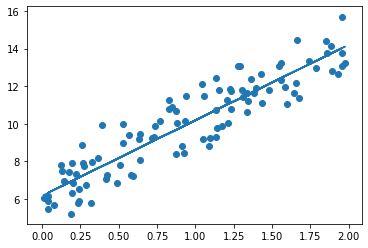

In [12]:
plt.scatter(X, y)
plt.plot(X,y_pred)

**미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출**

In [13]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [14]:
np.random.permutation(X.shape[0])

array([66, 71, 54, 88, 82, 12, 36, 46, 14, 67, 10,  3, 62, 29, 97, 69, 70,
       93, 31, 73, 60, 96, 28, 27, 21, 19, 33, 78, 32, 94,  1, 41, 40, 76,
       37, 87, 24, 23, 50,  2, 47, 20, 77, 17, 56, 64, 68, 25, 15, 22, 16,
       98, 63, 92, 86, 38,  6, 57, 95, 44,  9, 42, 81, 99, 35, 84, 59, 48,
       75, 65, 85, 90, 55, 43, 58, 89, 30, 80, 34, 18, 51, 49, 52, 74, 26,
       45, 39,  4, 11, 53, 91, 79,  8,  0,  5, 13, 61, 72,  7, 83])

In [15]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

y_pred:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
w1_update:  [[-0.1246454]]
w0_update:  [[-0.16654028]]
y_pred:  [[0.24581056]
 [0.3077888 ]
 [0.30824563]
 [0.26981223]
 [0.34511406]
 [0.37410474]
 [0.31913011]
 [0.18253166]
 [0.19049672]
 [0.25846007]]
w1_update:  [[-0.20040124]]
w0_update:  [[-0.19857482]]
y_pred:  [[0.81528657]
 [0.53710092]
 [0.78969643]
 [0.44200451]
 [0.37825894]
 [0.87253187]
 [0.75696752]
 [0.97923801]
 [0.70436518]
 [0.96683925]]
w1_update:  [[-0.25377652]]
w0_update:  [[-0.20381251]]
y_pred:  [[1.39818117]
 [0.68133654]
 [1.07549884]
 [0.79650046]
 [1.24790215]
 [1.37056541]
 [1.52854699]
 [1.3765378 ]
 [1.30972983]
 [0.66979252]]
w1_update:  [[-0.20028]]
w0_update:  [[-0.188384]]
y_pred:  [[2.28220091]
 [1.99098258]
 [1.67121978]
 [0.78881605]
 [0.97262916]
 [0.94160757]
 [0.91631848]
 [0.78864332]
 [1.43829757]
 [0.95820539]]
w1_update:  [[-0.12883739]]
w0_update:  [[-0.14813067]]
y_pred:  [[2.39626838]
 [1.73375706]
 [1.287472  ]
 [1.8

w0_update:  [[-0.00984045]]
y_pred:  [[11.19280501]
 [ 5.34759578]
 [14.38491071]
 [12.78277659]
 [ 6.24154139]
 [ 6.33740624]
 [14.19875014]
 [10.78588727]
 [12.89205708]
 [11.53904796]]
w1_update:  [[0.0023042]]
w0_update:  [[-0.00211946]]
y_pred:  [[ 8.76366292]
 [11.04698299]
 [ 8.71474151]
 [ 9.43549374]
 [11.9221981 ]
 [11.06729677]
 [10.71205874]
 [14.56798421]
 [ 7.20415219]
 [ 8.24368928]]
w1_update:  [[0.00047576]]
w0_update:  [[-0.00493409]]
y_pred:  [[14.20065744]
 [12.76234689]
 [10.7897386 ]
 [ 6.51925295]
 [11.18958125]
 [ 5.75875952]
 [14.71789655]
 [10.52504993]
 [ 6.42895213]
 [11.47209395]]
w1_update:  [[-0.00828223]]
w0_update:  [[-0.01475034]]
y_pred:  [[13.32218934]
 [12.92257354]
 [10.29907065]
 [ 6.34175012]
 [ 5.5689315 ]
 [ 8.26829847]
 [ 8.69903493]
 [ 9.45658433]
 [ 9.46201019]
 [ 7.77932883]]
w1_update:  [[-0.00152349]]
w0_update:  [[-0.00271713]]
y_pred:  [[ 8.79294486]
 [ 6.13786337]
 [10.74506723]
 [12.79507513]
 [14.23627719]
 [12.75672781]
 [ 6.3448276

w1_update:  [[-1.05268524e-05]]
w0_update:  [[-0.00783835]]
y_pred:  [[13.77403067]
 [10.55699603]
 [ 6.40429442]
 [11.72323719]
 [11.49376513]
 [ 8.45273948]
 [ 6.69943769]
 [ 6.0623105 ]
 [ 7.32687583]
 [ 6.45014045]]
w1_update:  [[0.00017554]]
w0_update:  [[-0.01308856]]
y_pred:  [[12.75517689]
 [10.95595042]
 [ 6.3248729 ]
 [ 6.84627093]
 [12.14924248]
 [ 7.33989538]
 [ 8.47114862]
 [14.45348209]
 [ 7.86579345]
 [11.1066503 ]]
w1_update:  [[0.00268655]]
w0_update:  [[-0.00552513]]
y_pred:  [[ 9.58744948]
 [ 9.75009568]
 [ 6.80310603]
 [10.60891776]
 [13.20519028]
 [14.45382935]
 [ 7.34436425]
 [13.28864942]
 [ 8.46953298]
 [14.1353127 ]]
w1_update:  [[0.02016097]]
w0_update:  [[0.00777884]]
y_pred:  [[ 7.95590863]
 [ 9.56198537]
 [14.22342322]
 [11.54143103]
 [ 9.05297491]
 [10.33017791]
 [ 7.96360357]
 [10.74315498]
 [11.09606708]
 [ 8.12433011]]
w1_update:  [[-0.00540372]]
w0_update:  [[-0.01060103]]
y_pred:  [[12.13263855]
 [12.67813129]
 [13.56299966]
 [11.72104067]
 [ 6.117858

w0_update:  [[-0.01388929]]
y_pred:  [[ 8.49220355]
 [ 7.31796856]
 [ 6.24675478]
 [ 9.33094235]
 [14.23112812]
 [12.94338927]
 [12.87416096]
 [ 6.9258791 ]
 [12.97544588]
 [13.49075687]]
w1_update:  [[0.00406464]]
w0_update:  [[-0.00491637]]
y_pred:  [[ 8.02953657]
 [13.948795  ]
 [13.29903163]
 [14.22810413]
 [ 8.85593878]
 [ 8.18838431]
 [ 6.06808345]
 [12.52023076]
 [11.5301172 ]
 [12.61767217]]
w1_update:  [[0.00706631]]
w0_update:  [[-2.97011185e-05]]
y_pred:  [[11.52072375]
 [ 8.46787127]
 [ 5.76784838]
 [13.76975104]
 [ 8.30027248]
 [ 8.02582741]
 [11.94147828]
 [ 9.79925664]
 [ 8.24175843]
 [ 7.55510645]]
w1_update:  [[-0.00532783]]
w0_update:  [[-0.00540262]]
y_pred:  [[11.35164239]
 [10.67436182]
 [ 8.89668551]
 [ 6.25640448]
 [10.67774945]
 [11.41440506]
 [10.83503418]
 [ 5.89591975]
 [ 6.76536612]
 [ 6.97960523]]
w1_update:  [[-0.00816002]]
w0_update:  [[-0.0089381]]
y_pred:  [[ 8.32260179]
 [ 6.89016364]
 [ 8.20638685]
 [ 8.51298925]
 [ 7.94912552]
 [ 6.77229087]
 [11.558

w1_update:  [[0.00872852]]
w0_update:  [[0.00530811]]
y_pred:  [[12.70790148]
 [ 7.65241123]
 [ 9.81583554]
 [ 6.80879052]
 [ 9.14747756]
 [10.56381201]
 [11.60718127]
 [ 6.69510602]
 [14.24489135]
 [ 8.5868572 ]]
w1_update:  [[0.00515071]]
w0_update:  [[0.00358255]]
y_pred:  [[ 6.4086288 ]
 [12.53672629]
 [13.77766751]
 [ 7.95077006]
 [10.33588302]
 [ 9.61179659]
 [13.48833215]
 [ 7.5415078 ]
 [ 9.40359917]
 [ 8.97116355]]
w1_update:  [[-0.00545889]]
w0_update:  [[-0.00919718]]
y_pred:  [[ 8.40557933]
 [14.12301231]
 [ 9.61709467]
 [12.96909149]
 [12.65033939]
 [11.15923581]
 [ 8.13505252]
 [10.73448185]
 [ 8.94833342]
 [ 9.8217346 ]]
w1_update:  [[0.00888021]]
w0_update:  [[0.0035273]]
y_pred:  [[11.13874305]
 [13.48789995]
 [10.78840678]
 [ 5.90569997]
 [11.78439704]
 [14.31358524]
 [ 9.81001123]
 [ 7.65091756]
 [ 6.69552863]
 [13.80862545]]
w1_update:  [[0.00799846]]
w0_update:  [[0.00367361]]
y_pred:  [[ 7.42477029]
 [ 7.53901421]
 [12.93390776]
 [ 6.87093822]
 [ 8.92899647]
 [10.

w0_update:  [[0.00434821]]
y_pred:  [[ 6.81007306]
 [ 9.15828227]
 [14.10691941]
 [10.50548638]
 [11.92666345]
 [11.73709176]
 [14.00013302]
 [ 6.94928919]
 [ 8.16619895]
 [13.71334971]]
w1_update:  [[0.0052987]]
w0_update:  [[0.00080304]]
y_pred:  [[ 6.80818861]
 [11.05907429]
 [13.82314396]
 [11.42772987]
 [ 6.76698801]
 [ 8.36970213]
 [ 9.41028926]
 [ 8.42582576]
 [10.49890899]
 [11.29097696]]
w1_update:  [[-0.00486939]]
w0_update:  [[-0.00383737]]
y_pred:  [[11.73953152]
 [ 8.37635796]
 [ 6.77177103]
 [14.11163207]
 [ 6.96447756]
 [ 9.61277777]
 [ 7.15769674]
 [ 8.16900613]
 [ 7.11455558]
 [ 8.00104171]]
w1_update:  [[0.00295887]]
w0_update:  [[0.00053237]]
y_pred:  [[ 6.76230207]
 [12.94786197]
 [ 7.05996623]
 [ 8.37411296]
 [ 7.15631604]
 [10.53706726]
 [ 6.88134231]
 [11.55284601]
 [11.06471813]
 [12.56247797]]
w1_update:  [[0.01014651]]
w0_update:  [[0.00748174]]
y_pred:  [[ 7.14592523]
 [ 8.16099382]
 [11.9117882 ]
 [ 6.94109552]
 [ 7.98662101]
 [ 7.10291959]
 [ 7.47728902]
 [

y_pred:  [[ 6.58971242]
 [ 7.12216232]
 [12.90617732]
 [10.71963693]
 [12.63114204]
 [11.95030898]
 [11.3713836 ]
 [14.18639856]
 [ 9.85558501]
 [ 7.38833647]]
w1_update:  [[0.0061766]]
w0_update:  [[-0.0003714]]
y_pred:  [[12.41707895]
 [ 9.08900762]
 [ 7.12094106]
 [10.71300898]
 [10.35720089]
 [12.44927613]
 [12.89626319]
 [ 7.77710688]
 [ 9.01336005]
 [ 6.64582688]]
w1_update:  [[-0.00323743]]
w0_update:  [[-0.0038005]]
y_pred:  [[10.36438936]
 [ 6.65008733]
 [11.43101359]
 [10.57437451]
 [11.32269795]
 [12.87523015]
 [ 6.2209559 ]
 [11.45747186]
 [13.21258134]
 [13.69951859]]
w1_update:  [[0.0016645]]
w0_update:  [[0.00203816]]
y_pred:  [[13.20764691]
 [ 6.10313654]
 [ 6.97079841]
 [11.36757037]
 [11.93650526]
 [ 6.83586514]
 [ 7.5686415 ]
 [11.45324877]
 [12.1341618 ]
 [ 7.03937558]]
w1_update:  [[-0.00555927]]
w0_update:  [[-0.0018136]]
y_pred:  [[ 6.38857816]
 [12.48345671]
 [11.80191763]
 [ 9.67232594]
 [12.46395201]
 [11.32745808]
 [11.43587644]
 [ 7.79604218]
 [13.67611718]


w0_update:  [[-0.00348565]]
y_pred:  [[ 7.24863389]
 [11.95399083]
 [ 8.1133135 ]
 [ 7.10224761]
 [ 6.90611937]
 [13.80490673]
 [ 6.44293953]
 [11.04667208]
 [ 9.93822401]
 [10.73541416]]
w1_update:  [[0.00592366]]
w0_update:  [[0.00964969]]
y_pred:  [[11.4220825 ]
 [ 6.90348136]
 [ 6.63567003]
 [ 9.66605631]
 [13.63656163]
 [ 6.94365686]
 [ 8.69856151]
 [ 7.2373471 ]
 [14.06746252]
 [11.65542119]]
w1_update:  [[-0.00994104]]
w0_update:  [[-0.00758647]]
y_pred:  [[ 8.27720861]
 [ 6.9129984 ]
 [ 9.68685543]
 [ 7.28980241]
 [ 9.49683865]
 [12.57193114]
 [ 8.69165657]
 [ 9.05076207]
 [11.04946865]
 [10.74966009]]
w1_update:  [[-0.00289256]]
w0_update:  [[-0.00780152]]
y_pred:  [[ 8.70128289]
 [ 6.92136166]
 [10.76392232]
 [11.0437945 ]
 [ 8.28654061]
 [11.45423395]
 [11.77514904]
 [10.57192365]
 [ 6.28292386]
 [ 8.48913527]]
w1_update:  [[-0.00249367]]
w0_update:  [[-0.00388704]]
y_pred:  [[ 6.71310513]
 [13.71438965]
 [12.50081792]
 [11.12681664]
 [13.83979311]
 [12.59214852]
 [ 7.114133

w0_update:  [[0.00067481]]
y_pred:  [[ 9.21164126]
 [11.60484055]
 [ 7.02146453]
 [12.54597266]
 [11.48410064]
 [12.72110142]
 [13.28880298]
 [ 6.29745747]
 [ 7.82359157]
 [ 9.05338734]]
w1_update:  [[0.00827565]]
w0_update:  [[0.00580078]]
y_pred:  [[ 6.16796377]
 [12.37783284]
 [ 6.69896201]
 [11.06839675]
 [13.56858251]
 [11.8548449 ]
 [ 8.67555736]
 [12.76531931]
 [ 9.44619294]
 [ 7.80225603]]
w1_update:  [[-0.00441828]]
w0_update:  [[-0.00284432]]
y_pred:  [[13.70281961]
 [10.49935232]
 [ 8.66073982]
 [ 6.95090595]
 [ 8.4522245 ]
 [10.68494353]
 [10.31477489]
 [ 7.4257917 ]
 [ 6.17084958]
 [ 7.01765656]]
w1_update:  [[0.00339384]]
w0_update:  [[0.00145544]]
y_pred:  [[ 7.01545193]
 [ 8.24984742]
 [ 9.63072281]
 [11.50101214]
 [ 8.68228755]
 [ 9.64328898]
 [12.38082093]
 [11.4751723 ]
 [ 7.09408391]
 [10.74289664]]
w1_update:  [[-0.00569136]]
w0_update:  [[-0.00513898]]
y_pred:  [[ 9.05297975]
 [ 6.61976952]
 [ 9.64083641]
 [11.26751077]
 [ 9.83684486]
 [13.11227915]
 [13.9681447 ]

## 5.4 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

* 각 컬럼별로 주택가격에 미치는 영향도를 조사

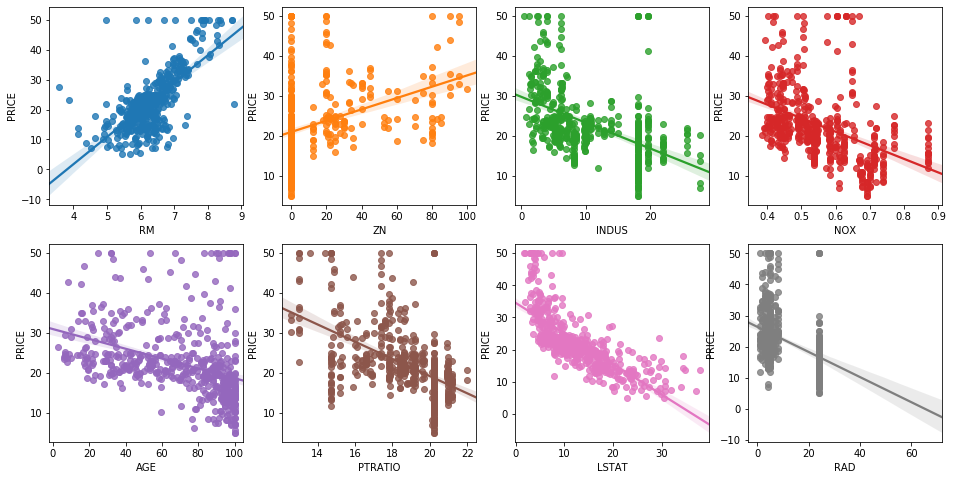

In [17]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

**학습과 테스트 데이터 세트로 분리하고 학습/예측/평가 수행**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [19]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164336
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [20]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [21]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))


 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


## 5-5. Polynomial Regression과 오버피팅/언더피팅 이해
### Polynomial Regression 이해

PolynomialFeatures 클래스로 다항식 변환

![](./image02.png)

In [22]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환할 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)


일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


3차 다항식 결정값을 구하는 함수 polynomial_func(X) 생성. 즉 회귀식은 결정값 y = 1+ 2x_1 + 3x_1^2 + 4x_2^3 

In [23]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

# 3 차 다항식 변환 
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]
3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


3차 다항식 계수의 피처값과 3차 다항식 결정값으로 학습

**사이킷런 파이프라인(Pipeline)을 이용하여 3차 다항회귀 학습**  

사이킷런의 Pipeline 객체는 Feature 엔지니어링 변환과 모델 학습/예측을 순차적으로 결합해줍니다. 

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))


Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


**다항 회귀를 이용한 보스턴 주택가격 예측**

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)


X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

## Pipeline을 이용하여 PolynomialFeatures 변환과 LinearRegression 적용을 순차적으로 결합. 
p_model = Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)),
                  ('linear', LinearRegression())])

p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)


print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

Boston 데이타셋 크기 : (506, 14)
MSE : 79625.593 , RMSE : 282.180
Variance score : -1116.598


In [26]:
X_train_poly= PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train, y_train)
X_train_poly.shape, X_train.shape

((354, 104), (354, 13))

### Polynomial Regression 을 이용한 Underfitting, Overfitting 이해

**cosine 곡선에 약간의 Noise 변동값을 더하여 실제값 곡선을 만듬**

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환. 
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이타 입니다.  
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다. 
y = true_fun(X) + np.random.randn(n_samples) * 0.1


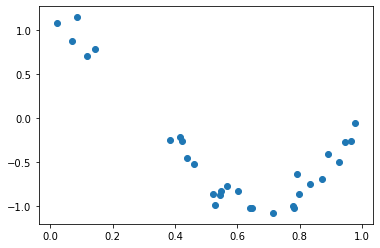

In [28]:
plt.scatter(X, y)


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03900000e+05 -1.87417100e+06  2.03717220e+07
 -1.44873987e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다.
Degree 15 MSE 는 182815433.54 입니다.


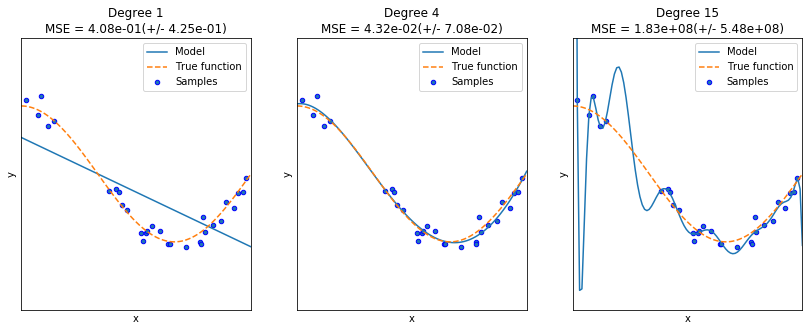

In [29]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()



## 5-6. Regularized Linear Models – Ridge, Lasso
### Regularized Linear Model - Ridge Regression

In [30]:
# 앞의 LinearRegression예제에서 분할한 feature 데이터 셋인 X_data과 Target 데이터 셋인 Y_target 데이터셋을 그대로 이용 
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)


ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

Boston 데이타셋 크기 : (506, 14)
 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518 


**alpha값을 0 , 0.1 , 1 , 10 , 100 으로 변경하면서 RMSE 측정**

In [31]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0 , 0.1 , 1 , 10 , 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330 


**각 alpha에 따른 회귀 계수 값을 시각화. 각 alpha값 별로 plt.subplots로 맷플롯립 축 생성**

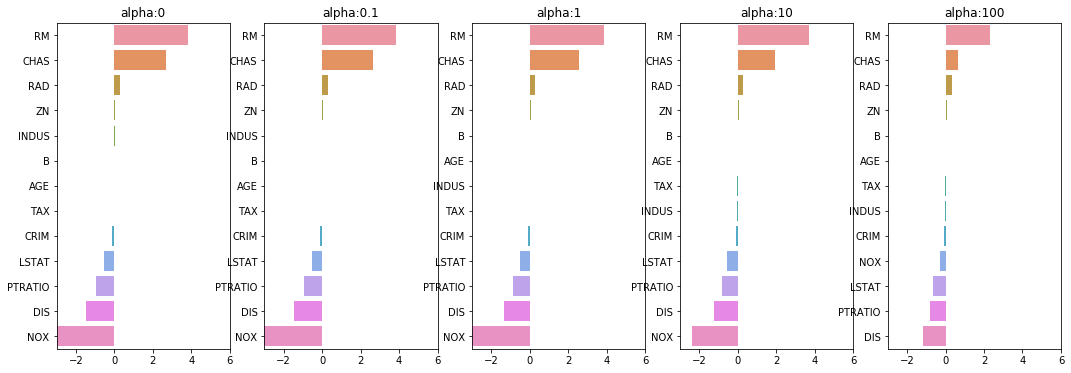

In [32]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()



**alpha 값에 따른 컬럼별 회귀계수 출력**

In [33]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


### 라쏘 회귀

In [34]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data , y_target)
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
        coeff = pd.Series(data=model.coef_ , index=X_data.columns )
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df
# end of get_linear_regre_eval

In [35]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


In [36]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


### 엘라스틱넷 회귀

In [37]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


In [38]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


### 선형 회귀 모델을 위한 데이터 변환

(506,)


(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

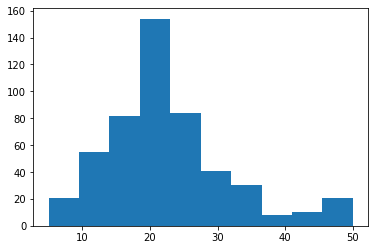

In [39]:
print(y_target.shape)
plt.hist(y_target, bins=10)

In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [41]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False)


## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421 

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634 

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635 

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.185 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 6.538 

## 변환 유형:Log, Polynomial Degree:None
alpha 0.1일 때 5 폴

In [42]:

X = np.arange(6).reshape(3, 2)
poly = PolynomialFeatures(3)
poly.fit_transform(X)

array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])